In [97]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [96]:
data=pd.read_csv('SalesExport.csv')
data.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,"17,524.02",14122.61,2/12/2020,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466
1,Finland,"116,563.40",92807.78,9/26/2019,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323
2,Portugal,"296,465.56",257480.34,7/11/2019,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341
3,Portugal,"74,532.02",59752.32,4/2/2020,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183
4,Spain,"178,763.42",146621.76,12/22/2019,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            1000 non-null   object 
 1    order_value_EUR   1000 non-null   object 
 2    cost              1000 non-null   float64
 3   date               1000 non-null   object 
 4   category           1000 non-null   object 
 5   customer_name      1000 non-null   object 
 6   sales_manager      1000 non-null   object 
 7   sales_rep          1000 non-null   object 
 8   device_type        1000 non-null   object 
 9   order_id           1000 non-null   object 
dtypes: float64(1), object(9)
memory usage: 78.2+ KB


In [4]:
data.shape


(1000, 10)

In [5]:
data.columns

Index(['country', ' order_value_EUR ', ' cost ', 'date', 'category',
       'customer_name', 'sales_manager', 'sales_rep', 'device_type',
       'order_id'],
      dtype='object')

In [6]:
data.index

RangeIndex(start=0, stop=1000, step=1)

In [7]:
data.nunique()

country                15
 order_value_EUR     1000
 cost                1000
date                  536
category               10
customer_name          75
sales_manager          15
sales_rep              35
device_type             3
order_id             1000
dtype: int64

In [8]:
data['country'].unique()

array(['Sweden', 'Finland', 'Portugal', 'Spain', 'UK', 'France',
       'Netherlands', 'Belgium', 'Bulgaria', 'Luxembourg', 'Italy',
       'Ireland', 'Germany', 'Denmark', 'Austria'], dtype=object)

In [9]:
data['category'].unique()

array(['Books', 'Games', 'Clothing', 'Beauty', 'Accessories',
       'Appliances', 'Smartphones', 'Outdoors', 'Electronics', 'Other'],
      dtype=object)

In [10]:
data['customer_name'].unique()

array(['Goldner-Dibbert', 'Hilll-Vandervort', 'Larkin-Collier',
       'Hessel-Stiedemann', 'Johns and Sons',
       'Farrell, Swaniawski and Crist', 'Schoen-Keeling',
       'Hermiston, Simonis and Wisoky', 'Gislason-Stanton',
       'Swaniawski, Runolfsson and Green', 'Wisoky Inc',
       'Tillman and Sons', 'Rowe, Hermiston and Kessler', 'Stamm Inc',
       'Romaguera-Dietrich', 'Franecki-White',
       'Jacobson, Marvin and Brown', 'Armstrong-Little',
       'Murray, Reichel and Nolan', 'Considine-Fisher', 'Kirlin and Sons',
       'Friesen-Rath', 'Keeling, Monahan and Pollich', 'Dibbert Inc',
       'Labadie and Sons', 'Wiza and Sons', 'Schmitt, Purdy and Johnson',
       'Hamill, Kulas and Roob', 'Fisher, Morar and Skiles',
       'McGlynn-Bergstrom', 'Spencer, Rogahn and Muller', 'Wunsch LLC',
       'Walter LLC', 'Christiansen, Donnelly and Bechtelar',
       'Altenwerth-Konopelski', 'Hegmann Group',
       'Leffler, Prohaska and Streich', 'Smith Group',
       'Zieme, Bailey a

In [11]:
data['device_type'].unique()

array(['Mobile', 'PC', 'Tablet'], dtype=object)

In [12]:
data.describe()

,cost
count,1000.000000
mean,94369.310990
std,51540.020934
min,12113.680000
25%,54247.957500
50%,87094.760000
75%,125570.837500
max,304701.430000


In [13]:
data.describe(include='object')

,country,order_value_EUR,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,15,1000,536,10,75,15,35,3,1000
top,Portugal,"17,524.02",3/1/2020,Clothing,Johns and Sons,Celine Tumasian,Amelina Piscopiello,PC,70-0511466
freq,239,1,5,155,142,239,56,785,1


In [14]:
data.isnull().sum()

country              0
 order_value_EUR     0
 cost                0
date                 0
category             0
customer_name        0
sales_manager        0
sales_rep            0
device_type          0
order_id             0
dtype: int64

In [16]:
data.duplicated().sum()

0

In [18]:
dataarray=data.to_numpy()

In [21]:
dataarray

array([['Sweden', '17,524.02', 14122.61, ..., 'Madelon Bront', 'Mobile',
        '70-0511466'],
       ['Finland', '116,563.40', 92807.78, ..., 'Wat Bowkley', 'Mobile',
        '28-6585323'],
       ['Portugal', '296,465.56', 257480.34, ..., 'Smitty Culverhouse',
        'PC', '58-7703341'],
       ...,
       ['Finland', '74,480.56', 60023.88, ..., 'Wat Bowkley', 'PC',
        '31-1849120'],
       ['Spain', '87,205.01', 69171.01, ..., 'Manuel Goudie', 'Tablet',
        '45-3085595'],
       ['Portugal', '107,716.72', 86679.64, ..., 'Brynn Dempster',
        'Mobile', '61-3294149']], dtype=object)

In [98]:
col_array=data['country'].to_numpy()  

In [99]:
col_array

array(['Sweden', 'Finland', 'Portugal', 'Portugal', 'Spain', 'Spain',
       'Portugal', 'UK', 'Portugal', 'France', 'Sweden', 'UK', 'Portugal',
       'UK', 'UK', 'Sweden', 'France', 'UK', 'Portugal', 'Portugal',
       'Spain', 'Sweden', 'Netherlands', 'Finland', 'Portugal', 'Sweden',
       'Portugal', 'Belgium', 'Bulgaria', 'Luxembourg', 'Portugal',
       'Spain', 'Netherlands', 'Portugal', 'Sweden', 'Portugal', 'France',
       'UK', 'Portugal', 'Sweden', 'France', 'France', 'UK', 'France',
       'Netherlands', 'UK', 'Italy', 'Portugal', 'France', 'Sweden',
       'Portugal', 'France', 'Portugal', 'Sweden', 'Portugal', 'Portugal',
       'France', 'France', 'Bulgaria', 'Portugal', 'Bulgaria', 'Portugal',
       'Portugal', 'Sweden', 'Sweden', 'Ireland', 'Sweden', 'Spain',
       'France', 'France', 'France', 'Sweden', 'France', 'Portugal',
       'Portugal', 'Sweden', 'UK', 'Portugal', 'Portugal', 'Sweden',
       'Sweden', 'Bulgaria', 'Sweden', 'Portugal', 'France', 'Portugal',

In [31]:
 data.columns

Index(['country', ' order_value_EUR ', ' cost ', 'date', 'category',
       'customer_name', 'sales_manager', 'sales_rep', 'device_type',
       'order_id'],
      dtype='object')

In [40]:
total_order = data['sales_rep'].sum()
total_order

'Madelon BrontWat BowkleySmitty CulverhouseAurelie WrenBertha WalbrookPerri AldersleySmitty CulverhouseWinny AgnoloSmitty CulverhouseMaighdiln UpcraftMadelon BrontWinny AgnoloAurelie WrenWinny AgnoloGenevra CharrissonAnita WoakesAmelina PiscopielloJay MorefieldCorene ShirerCorene ShirerBertha WalbrookAlyosha MeahNero HarbisherWat BowkleyHortense GerringAnita WoakesAurelie WrenCollin MacknessShermy McGreadyJocelyn LaurentinoAurelie WrenBertha WalbrookNero HarbisherHortense GerringCaro MorfieldHortense GerringMaighdiln UpcraftWinny AgnoloCorene ShirerCaro MorfieldCrysta HallsCrysta HallsGenevra CharrissonOra GrennanNero HarbisherWinny AgnoloJoshua PrevostAurelie WrenAvrit ChandersAlyosha MeahSmitty CulverhouseOra GrennanHortense GerringAlyosha MeahHortense GerringHortense GerringOra GrennanAvrit ChandersBernadine FullagarCorene ShirerShermy McGreadySmitty CulverhouseAurelie WrenTarrah CastellettiAlyosha MeahBunnie TonbridgeMadelon BrontPerri AldersleyCrysta HallsAvrit ChandersOra Grennan

In [43]:
duplicates = data['country'].duplicated().sum()
duplicates

985

In [46]:

dupli=data['customer_name'].duplicated().sum()
dupli

925

In [49]:
data.groupby('country').get_group('Finland')

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
1,Finland,"116,563.40",92807.78,9/26/2019,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323
23,Finland,"236,462.30",205674.91,12/23/2020,Clothing,Hessel-Stiedemann,Hube Corey,Wat Bowkley,PC,41-6407014
110,Finland,"235,608.66",201468.96,7/27/2020,Games,Hegmann Group,Hube Corey,Wat Bowkley,Tablet,42-8394841
158,Finland,"205,582.75",166748.17,12/22/2020,Beauty,Tromp LLC,Hube Corey,Wat Bowkley,PC,64-4923214
199,Finland,"200,635.57",172245.64,12/11/2019,Clothing,Larkin-Collier,Hube Corey,Wat Bowkley,PC,94-8026718
210,Finland,"25,816.05",21447.97,9/8/2019,Clothing,Smith Group,Hube Corey,Mellicent Mattys,Mobile,95-7886861
212,Finland,"194,962.05",154975.33,7/5/2020,Appliances,"Rowe, Hermiston and Kessler",Hube Corey,Mellicent Mattys,PC,54-5082146
224,Finland,"186,397.60",161233.92,12/4/2020,Appliances,Friesen and Sons,Hube Corey,Mellicent Mattys,Mobile,13-0833129
243,Finland,"35,619.28",28192.66,1/8/2019,Electronics,"Murray, Reichel and Nolan",Hube Corey,Wat Bowkley,PC,18-8528486
255,Finland,"48,946.74",38765.82,4/19/2019,Accessories,"Swaniawski, Runolfsson and Green",Hube Corey,Mellicent Mattys,PC,65-2022928


In [51]:
data.groupby('device_type').get_group('PC')

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
2,Portugal,"296,465.56",257480.34,7/11/2019,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341
3,Portugal,"74,532.02",59752.32,4/2/2020,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183
5,Spain,"84,900.24",73701.90,7/14/2020,Clothing,"Farrell, Swaniawski and Crist",Emalia Dinse,Perri Aldersley,PC,60-6998932
6,Portugal,"71,620.08",62245.01,2/5/2019,Books,Schoen-Keeling,Celine Tumasian,Smitty Culverhouse,PC,69-6259390
7,UK,"156,585.22",126599.15,8/30/2020,Accessories,"Hermiston, Simonis and Wisoky",Jessamine Apark,Winny Agnolo,PC,64-5761908
...,...,...,...,...,...,...,...,...,...,...
991,Portugal,"83,904.32",69011.30,6/7/2020,Games,"Hartmann, Hane and Pfannerstill",Celine Tumasian,Corene Shirer,PC,00-7326184
992,UK,"133,696.86",109310.55,1/27/2020,Books,Hilll-Vandervort,Jessamine Apark,Winny Agnolo,PC,22-0156233
993,UK,"146,076.81",123230.40,7/27/2019,Appliances,Johns and Sons,Jessamine Apark,Genevra Charrisson,PC,94-0623186
994,France,"56,118.05",47711.57,3/2/2020,Beauty,Altenwerth-Konopelski,Othello Bowes,Amelina Piscopiello,PC,08-0446109


In [58]:
column_array=data['customer_name'].to_numpy()
column_array

array(['Goldner-Dibbert', 'Hilll-Vandervort', 'Larkin-Collier',
       'Hessel-Stiedemann', 'Johns and Sons',
       'Farrell, Swaniawski and Crist', 'Schoen-Keeling',
       'Hermiston, Simonis and Wisoky', 'Hessel-Stiedemann',
       'Gislason-Stanton', 'Swaniawski, Runolfsson and Green',
       'Gislason-Stanton', 'Hessel-Stiedemann', 'Wisoky Inc',
       'Johns and Sons', 'Tillman and Sons',
       'Rowe, Hermiston and Kessler', 'Tillman and Sons',
       'Goldner-Dibbert', 'Stamm Inc', 'Johns and Sons', 'Johns and Sons',
       'Johns and Sons', 'Hessel-Stiedemann', 'Romaguera-Dietrich',
       'Franecki-White', 'Jacobson, Marvin and Brown', 'Armstrong-Little',
       'Murray, Reichel and Nolan', 'Swaniawski, Runolfsson and Green',
       'Considine-Fisher', 'Kirlin and Sons', 'Friesen-Rath',
       'Keeling, Monahan and Pollich', 'Swaniawski, Runolfsson and Green',
       'Hessel-Stiedemann', 'Dibbert Inc', 'Labadie and Sons',
       'Friesen-Rath', 'Wiza and Sons', 'Rowe, Hermis

In [61]:
data.groupby('customer_name').get_group('Goldner-Dibbert')

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,"17,524.02",14122.61,2/12/2020,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466
18,Portugal,"147,656.52",124193.90,6/5/2019,Smartphones,Goldner-Dibbert,Celine Tumasian,Corene Shirer,PC,85-4732103
154,Ireland,"117,358.02",102664.80,11/2/2020,Clothing,Goldner-Dibbert,Glenine Suttaby,Palm Wetherald,PC,79-8966057
204,France,"53,089.52",44812.86,8/24/2019,Beauty,Goldner-Dibbert,Othello Bowes,Crysta Halls,PC,32-2114915
609,Spain,"77,855.47",63545.63,8/13/2019,Outdoors,Goldner-Dibbert,Emalia Dinse,Bertha Walbrook,PC,77-3226391
757,France,"57,333.85",46308.55,10/24/2020,Other,Goldner-Dibbert,Othello Bowes,Amelina Piscopiello,PC,35-9605742
785,Portugal,"106,325.72",92705.40,9/19/2019,Games,Goldner-Dibbert,Celine Tumasian,Aurelie Wren,Mobile,77-5229094
860,France,"80,839.75",63936.16,5/21/2020,Games,Goldner-Dibbert,Othello Bowes,Crysta Halls,PC,00-6227453
869,France,"250,488.42",214142.55,6/13/2020,Appliances,Goldner-Dibbert,Othello Bowes,Amelina Piscopiello,PC,18-2580592


In [68]:
duplica=data['date'].duplicated().sum()
duplica

464

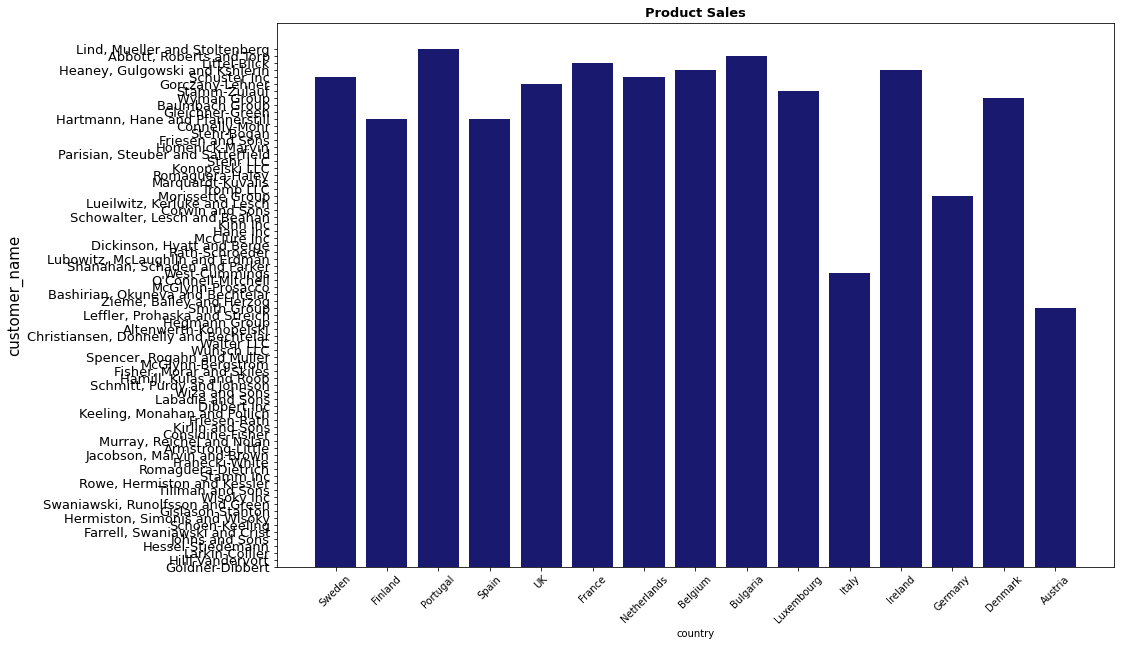

In [119]:
plt.figure(figsize=(15,10))
plt.bar(x=data["country"],
       height=data["customer_name"],
       color="midnightblue")
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=13)
plt.xlabel('country',fontsize=10)
plt.ylabel('customer_name',fontsize=15)
plt.title('Product Sales',fontsize=13,fontweight="bold")
plt.show()